In [2]:
import pandas as pd

In [3]:
edges = pd.read_csv("edges.csv")
edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [4]:
hero_network = pd.read_csv('hero-network.csv')
hero_network 

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [5]:
nodes = pd.read_csv('nodes.csv')
nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


In [6]:
import networkx as nx
#degree number of edges

### ADDING NODES


In [ ]:
import networkx as nx

# Create a new graph
G = nx.Graph()

# Add some nodes and edges to the graph 
G.add_node(1) #we pass the label of the node 
G.add_nodes_from([2,3])

G.nodes()
# Draw the graph
nx.draw(G)



In [ ]:
G.nodes()[1]['name'] = 'Spiderman'
G.nodes()[1]

In [ ]:
G.add_nodes_from([(4,{'name' :'Thor'}), (15, {'comic': 'Peter Parker'})])

In [ ]:
G.nodes()

In [ ]:
G.remove_node(4)

### ADDING EDGES + ATTRIBUTES

In [ ]:
G.add_edge(1,2)

In [ ]:
G.add_edges_from([(2,3), (1,4), (2,15)])

In [ ]:
G.edges()

In [ ]:
G.edges()[(1,2)]['weight'] =0.5
G.edges()[(1,2)]

In [ ]:
list(G.edges)

In [ ]:
G.remove_edge(2,15)

In [ ]:
nx.draw(G)

### STATS

In [ ]:
nx.info(G)

In [ ]:
G.degree(15)

### ADJACENCY

In [ ]:
G[1] #vede a chi è connesso

In [ ]:
G[2]

In [ ]:
G.nodes.data()

### VISUALIZATION

In [ ]:
G.add_edge(2,15)

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
nx.draw(G, with_labels=True, node_color= 'limegreen')
plt.show()


In [ ]:
C= nx.complete_graph(20)
nx.draw(C, with_labels=True, node_color= 'limegreen')

In [ ]:
H=nx.cycle_graph(5)
nx.draw(H, with_labels=True, node_color= 'limegreen')

In [ ]:
L =nx.lollipop_graph(6,3)
nx.draw(L, with_labels=True, node_color= 'limegreen')

In [ ]:
SG = L.subgraph([6,7,8])
nx.draw(SG, with_labels=True, node_color= 'limegreen')

In [ ]:
HL = nx.union(H, L, rename=('H-', 'L-'))

In [ ]:
nx.draw(HL, with_labels=True, node_color= 'limegreen')

In [ ]:
G = nx.complete_graph(4)

In [ ]:
nx.draw(G, with_labels=True, node_color= 'limegreen')

In [ ]:
nx.is_connected(G)

### GRAPH SETUP

In [ ]:
import pandas as pd 
G_hero_net = nx.MultiGraph()

In [ ]:
hero_network

In [ ]:
G_hero_net.add_edge(hero_network.loc[0].hero1, hero_network.loc[0].hero2)

In [ ]:
G_hero_net.nodes

In [ ]:
hero_network.loc[0]

In [ ]:
hero_network.apply(lambda row: G_hero_net.add_edge(row['hero1'], row['hero2']), axis=1)

In [ ]:
#create a new GRAPG 

G_hero_2 = nx.from_pandas_edgelist(hero_network, 'hero1', 'hero2', create_using = nx.MultiGraph)

In [ ]:
nx.info(G_hero_2)

In [ ]:
nx.degree_centrality(G_hero_net)['PRINCESS ZANDA']

In [ ]:
nx.betweenness_centrality(G_hero_net)['PRINCESS ZANDA']

In [ ]:
nx.node_connectivity(G_hero_net,'PRINCESS ZANDA', "BLACK PANTHER/T'CHAL")

In [ ]:
G_hero_net.nodes()

### DATA PREPROCESSING
- Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'.
- Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.
- The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'.


In [ ]:
import csv
import re

# Read the hero-network.csv file
with open('hero-network.csv', 'r') as f:
    reader = csv.reader(f)
    
    # Create a new list to hold the cleaned data
    cleaned_data = []
    
    # Loop through the rows in the CSV file
    for row in reader:
        # Use a regular expression to remove the extra spaces from the names
        # in the row
        cleaned_row = [re.sub(r' +', '', name) for name in row]
        
        
        # Add the cleaned row to the list
        cleaned_data.append(cleaned_row)

# Write the cleaned data to a new CSV file
with open('hero-network-cleaned.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(cleaned_data)

    #questo funziona

In [ ]:
# find the names that appear in both sets of names
import pandas as pd
df1 = pd.read_csv('hero-network-cleaned.csv')

# read the second dataset into a dataframe
df2 = pd.read_csv('edges.csv')

# create a set of hero names from the hero1 and hero2 columns in the first dataset
hero_names1 = set(df1['hero1']) | set(df1['hero2'])

# create a set of hero names from the hero column in the second dataset
hero_names2 = set(df2['hero'])

common_names = df1[df1['hero1'].isin(hero_names2) | df1['hero2'].isin(hero_names2)]

# print the common names
print(common_names)

common_names.count()


In [ ]:
# read the hero-network.csv file into a dataframe
import pandas as pd
hero_network_df = pd.read_csv('hero-network.csv')

# read the edges.csv file into a dataframe
edges_df = pd.read_csv('edges.csv')

# create a set of hero names from the hero1 and hero2 columns in hero-network.csv
hero_network_names = set(hero_network_df['hero1']) | set(hero_network_df['hero2'])

# create a set of hero names from the hero column in edges.csv
edges_names = set(edges_df['hero'])

# find the names that appear in hero-network.csv but not in edges.csv
# and remove any extra spaces and the extra '/' from the end of the names
missing_names = [name.strip()[:-1] for name in hero_network_names - edges_names if name[-1] == '/']

# update the names in hero-network.csv to match the names in edges.csv
hero_network_df.loc[hero_network_df['hero1'].isin(missing_names), 'hero1'] = missing_names
hero_network_df.loc[hero_network_df['hero2'].isin(missing_names), 'hero2'] = missing_names

# write the updated dataframe to a new csv file
hero_network_df.to_csv('hero-network-corrected.csv', index=False)


In [ ]:
print(missing_names)

In [ ]:
hero_network_df_corrected = pd.read_csv('hero-network-corrected.csv')
hero_network_df_corrected 

In [ ]:


# load the dataset into a pandas DataFrame
hero_network_df_corrected = pd.read_csv('hero-network.csv')

# replace the string 'SPIDER-MAN/PETER PAR' with 'SPIDER-MAN/PETER PARKER' in columns 'hero1' and 'hero2'
hero_network_df_corrected['hero1'] = hero_network_df_corrected['hero1'].replace('SPIDER-MAN/PETER PAR', 'SPIDER-MAN/PETER PARKER')
hero_network_df_corrected['hero2'] = hero_network_df_corrected['hero2'].replace('SPIDER-MAN/PETER PAR', 'SPIDER-MAN/PETER PARKER')

# save the modified DataFrame to a new CSV file
hero_network_df_corrected.to_csv('modified-hero-network.csv', index=False)


In [7]:
df = pd.read_csv('modified-hero-network.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [ ]:
df[df.hero1 == 'SPIDER-MAN/PETER PARKER']

In [ ]:
df[df.hero2 == 'SPIDER-MAN/PETER PARKER']

In [ ]:
df

- Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.

In [ ]:
df_subset = df[df['hero1'] != df['hero2']]

# save the new DataFrame to a new CSV file
df_subset.to_csv('final-hero-network.csv', index=False)

In [8]:
df = pd.read_csv('final-hero-network.csv')
df

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
572230,COLOSSUS II/PETER RA,CALLISTO
572231,CALLISTO,ROGUE /
572232,CALLISTO,CALIBAN/
572233,CALIBAN/,ROGUE /


In [9]:
count = df[df['hero1'] == df['hero2']].shape[0]

# print the count
print(count)

#OK IT WORKS, there's not the duplicate rows

0


### Graphs setup

First graph: Will be constructed using the data stored in the 'hero-network.csv' file, in which an edge between two heroes can be found if they have appeared in the same comic together. The number of edges between two heroes represents the number of times they have collaborated in different comics. The graph should be considered weighted and undirected. It is up to you to decide which metric to use to calculate the weights, but we anticipate that the cost will be lower for heroes with more collaborations. Please specify which metric you used to select the weights in the report.



In [11]:
import pandas as pd
import networkx as nx

# load the datasets into pandas DataFrames
df = pd.read_csv('final-hero-network.csv')
df_edges = pd.read_csv('edges.csv')

# create an empty undirected graph using NetworkX
g = nx.Graph()

# add all the heroes in the dataset as nodes in the graph
g.add_nodes_from(df['hero1'].unique())

# add edges between heroes in the graph based on the number of collaborations they have
for index, row in df.iterrows():
    # use the total number of comics in which the two heroes have appeared as the weight of the edge
    comics = df_edges[df_edges['hero'].isin([row['hero1'], row['hero2']])]['comic'].sum()
    g.add_edge(row['hero1'], row['hero2'], weight=comics)

# print the number of nodes and edges in the graph
print(f'Number of nodes: {g.number_of_nodes()}')
print(f'Number of edges: {g.number_of_edges()}')



Number of nodes: 6426
Number of edges: 167207


In [ ]:
!pip install scipy --upgrade


In [ ]:
pip install --upgrade scipy networkx

In [ ]:
pip install scipy==1.8.0


In [ ]:
pip install networkx==2.6.3


MemoryError: Unable to allocate 23.4 GiB for an array with shape (334414,) and data type <U18757

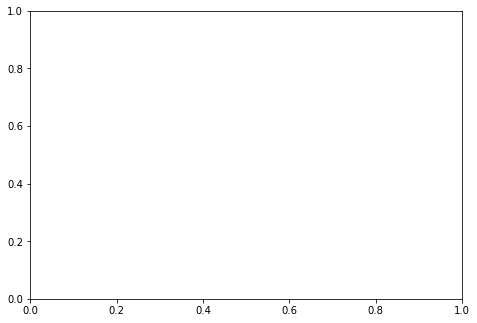

In [12]:
nx.draw(g, node_color= 'limegreen')
plt.show()